Output()

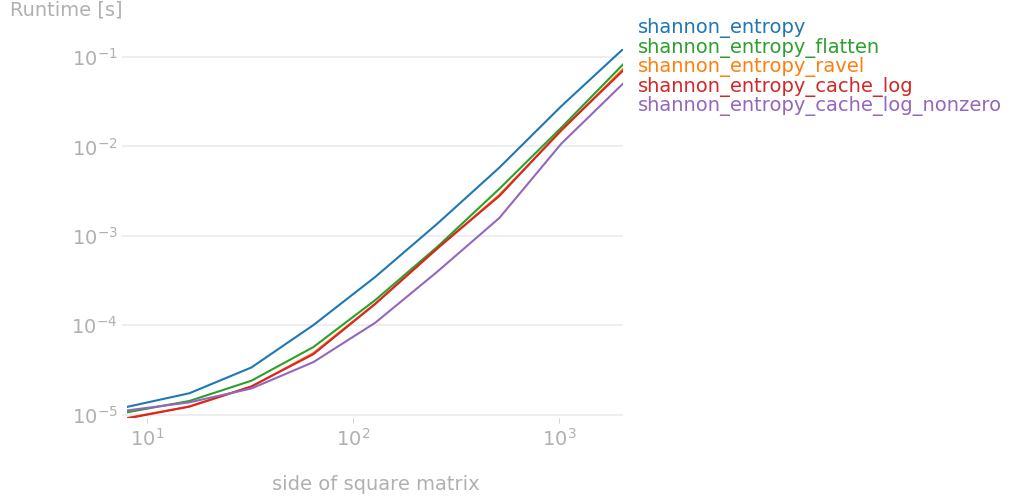

In [1]:
import numpy as np
import numpy.typing as npt

import perfplot


def shannon_entropy(a: npt.NDArray) -> npt.NDArray:
    a /= a.sum()
    a = a[np.nonzero(a)]
    return -(a * np.log2(a)).sum()


def shannon_entropy_ravel(a: npt.NDArray) -> npt.NDArray:
    a = a.ravel()
    a /= a.sum()
    a = a[np.nonzero(a)]
    return -(a * np.log2(a)).sum()


def shannon_entropy_cache_log(a: npt.NDArray) -> npt.NDArray:
    a = a.ravel()
    a /= a.sum()
    a = a[np.nonzero(a)]
    a *= np.log2(a)
    return -a.sum()


def shannon_entropy_cache_log_nonzero(a: npt.NDArray) -> npt.NDArray:
    a = a.ravel()
    a /= a.sum()
    a = a[np.nonzero(a != 0)]
    a *= np.log2(a)
    return -a.sum()


rng = np.random.default_rng(0)

perfplot.show(
    setup=lambda n: rng.uniform(low=0, high=1, size=(n, n)),
    kernels=[
        shannon_entropy,
        shannon_entropy_ravel,
        shannon_entropy_cache_log,
        shannon_entropy_cache_log_nonzero,
    ],
    n_range=[2 ** k for k in range(3, 12)],
    xlabel="side of square matrix",
)
